In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('Superstore_Sales_Data.csv', encoding = "ISO-8859-1")

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [21]:
df.shape

(11251, 15)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Customer Name     11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   Region            11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Sales             11239 non-null  float64
 12  Status            0 non-null      float64
 13  unnamed1          0 non-null      float64
 14  State             11251 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [23]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace= True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Customer Name     11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   Region            11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Sales             11239 non-null  float64
 12  State             11251 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [23]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [25]:
df.dropna(inplace=True)

In [27]:
df["Sales"] = df["Sales"].astype("int")

In [28]:
df["Sales"].dtypes

dtype('int64')

In [32]:
df[["Age", "Orders", "Sales"]].describe()

,Age,Orders,Sales
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,113.403328
std,12.753866,1.114967,62.926067
min,12.000000,1.000000,2.000000
25%,27.000000,2.000000,65.000000
50%,33.000000,2.000000,97.000000
75%,43.000000,3.000000,152.000000
max,92.000000,4.000000,288.000000


# Exploratory Data Analysis

# Gender

In [33]:
df.columns

Index(['User_ID', 'Customer Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'Region', 'Occupation', 'Product_Category', 'Orders',
       'Sales', 'State'],
      dtype='object')

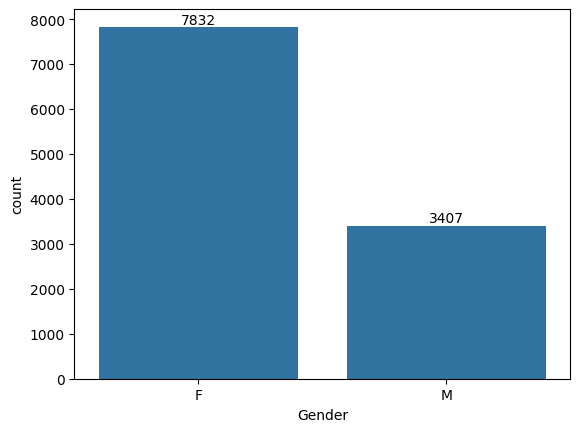

In [34]:
ax = sns.countplot(x = "Gender", data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [35]:
df.groupby(["Gender"], as_index= False)["Sales"].sum().sort_values(by="Sales", ascending= False)

,Gender,Sales
0,F,891748
1,M,382792


<Axes: xlabel='Gender', ylabel='Sales'>

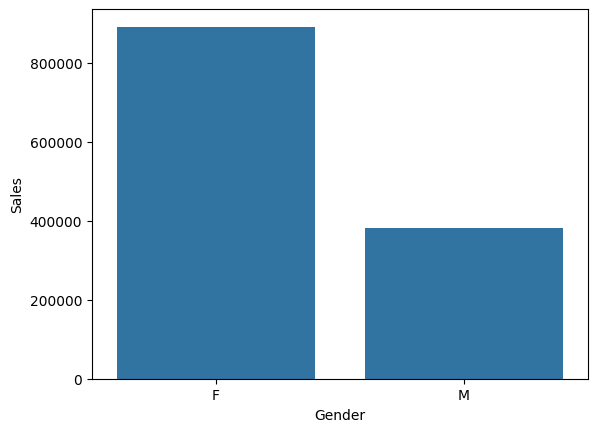

In [39]:
sales_gen = df.groupby(["Gender"], as_index= False)["Sales"].sum().sort_values(by="Sales", ascending= False)
sns.barplot(x = "Gender", y = "Sales", data= sales_gen)

# From the above graph we can see that most buyers are female and purchasing power of females are more than man

# Age

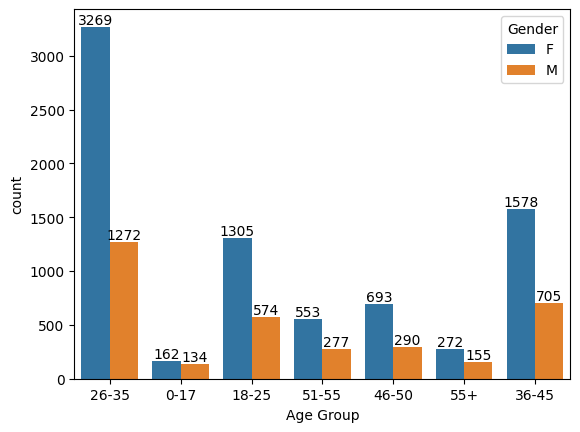

In [40]:
ax = sns.countplot(data = df, x = "Age Group" , hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Sales'>

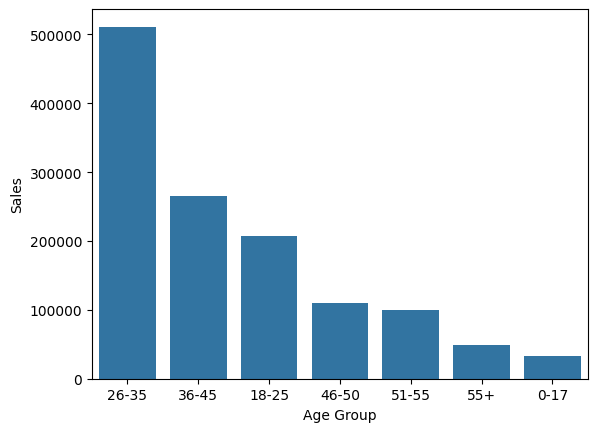

In [41]:
sales_gen = df.groupby(["Age Group"], as_index= False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(x = "Age Group", y = "Sales", data = sales_gen)

# From the above chartb we can see that most of the buyers are 26-35 years of age group and they are feamle

# State

<Axes: xlabel='State', ylabel='Orders'>

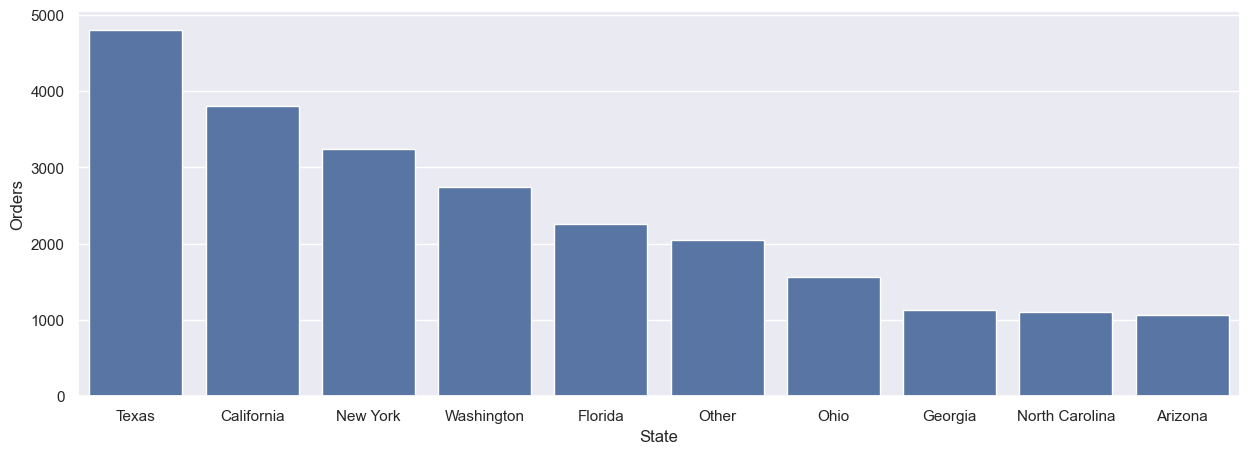

In [42]:
sales_state = df.groupby(["State"], as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = "State", y = "Orders", data = sales_state)

# From the above graph we can see that top orders are from Texas, California and New York 

<Axes: xlabel='State', ylabel='Sales'>

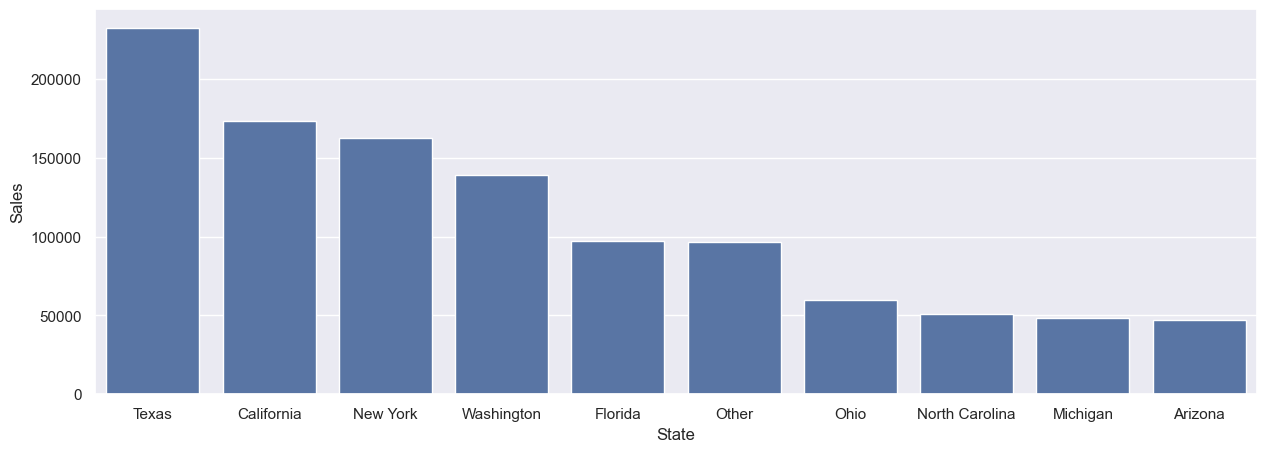

In [43]:
sales_state = df.groupby(["State"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = "State", y = "Sales", data = sales_state)

# From the above graph we can see that top sales are from Texas, California and New York


# Marital Status

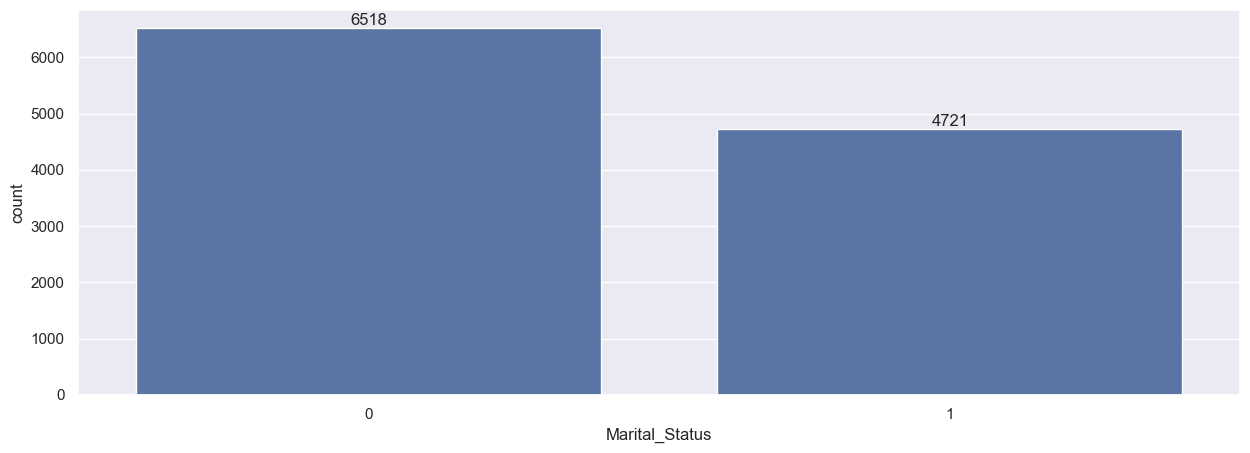

In [44]:
ax = sns.countplot(x = "Marital_Status", data = df)
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Sales'>

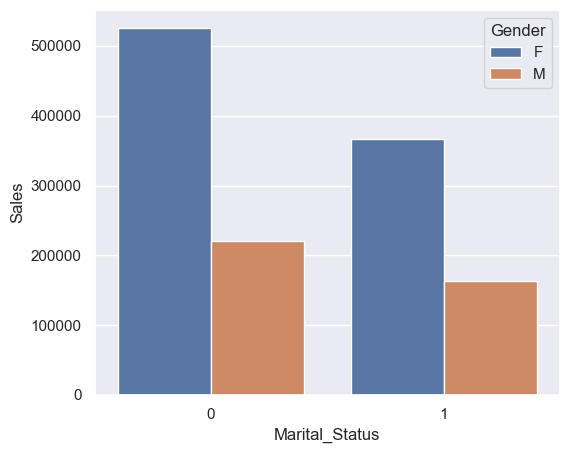

In [45]:
sales_state = df.groupby(["Marital_Status", "Gender"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x = "Marital_Status", y = "Sales", hue = "Gender", data = sales_state)

# From above graph we can see that most buyers are married women and they have high purchasing power


# Occupation

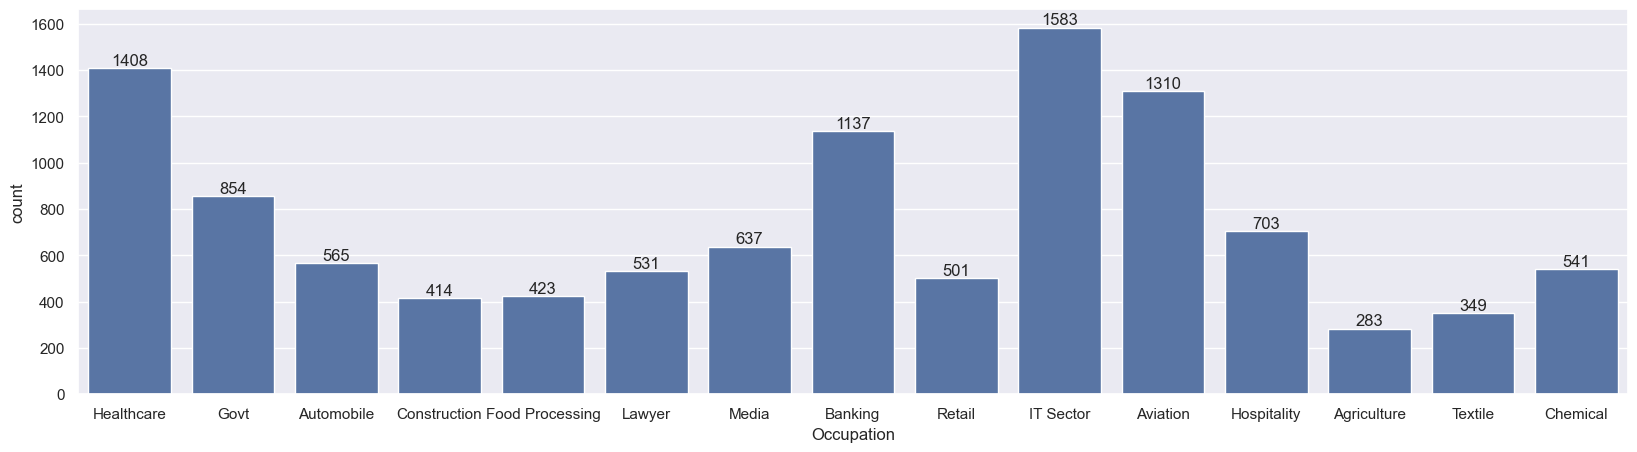

In [46]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x = "Occupation", data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Sales'>

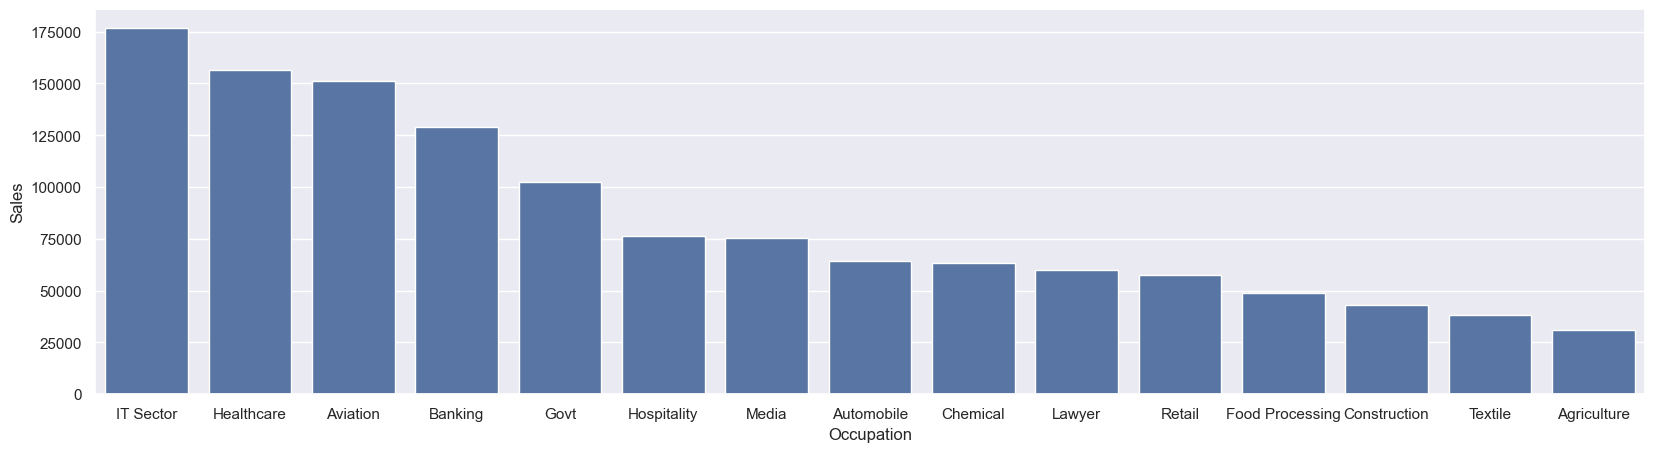

In [47]:
sales_state = df.groupby(["Occupation"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = "Occupation", y = "Sales", data = sales_state)

# From the above graph we can see that most buyers are from IT Sector, Heathcare and Aviation


# Product Category

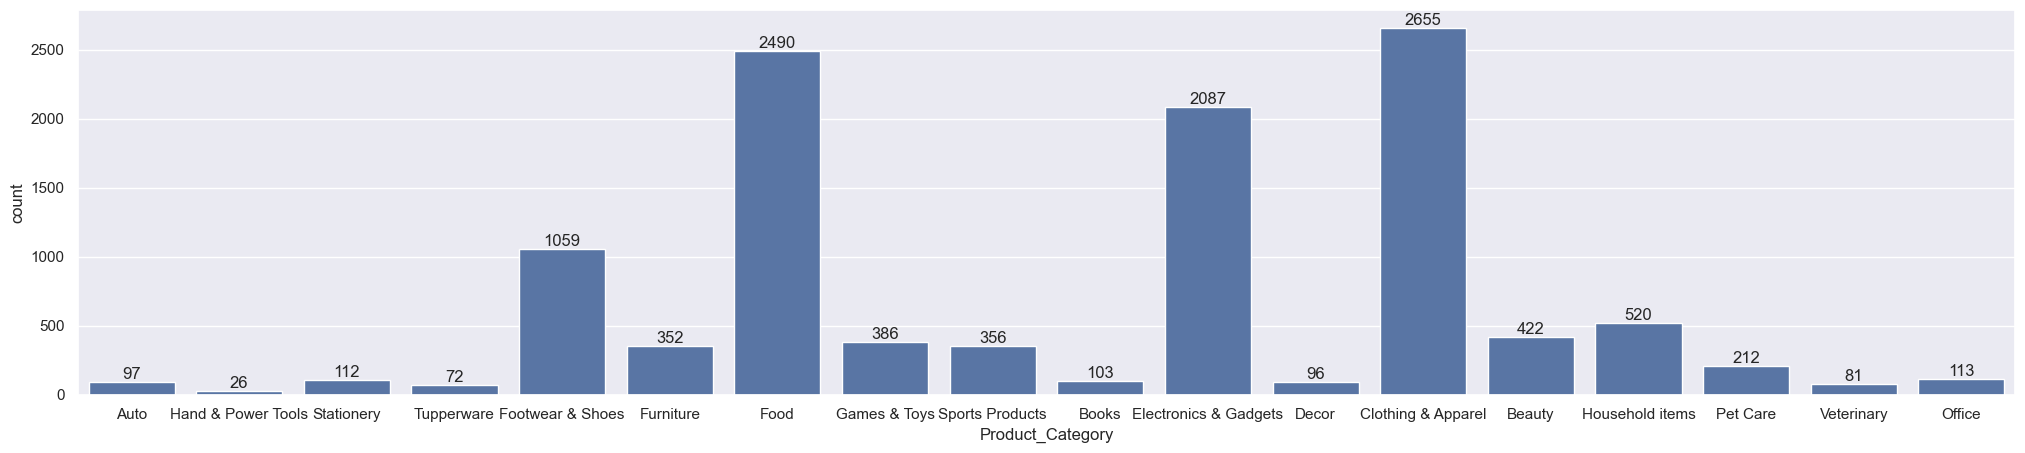

In [48]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(x = "Product_Category", data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Sales'>

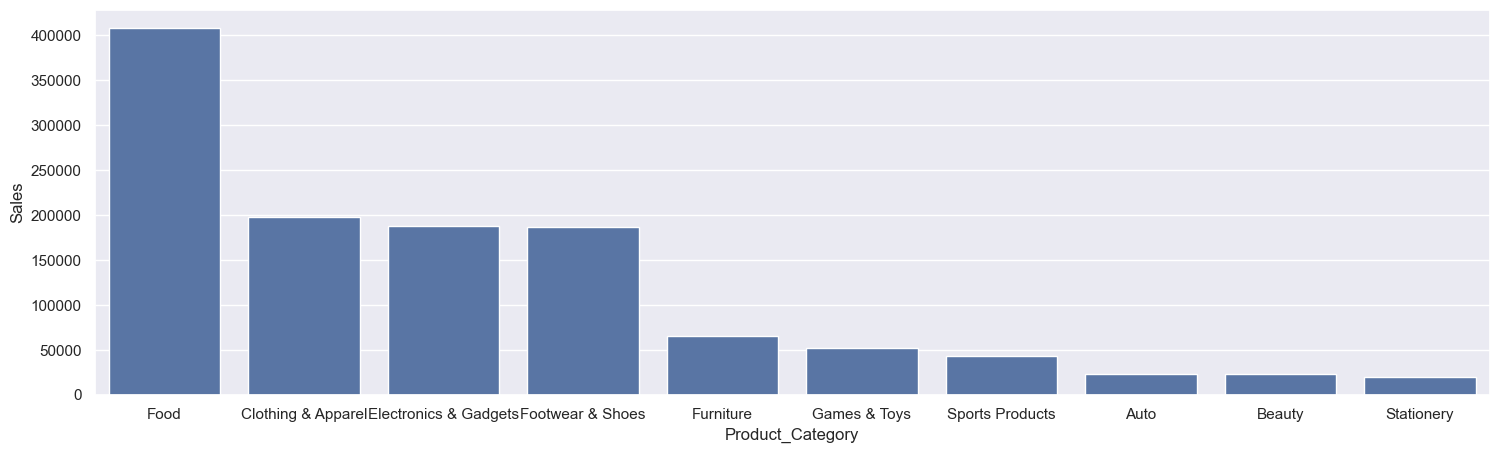

In [49]:
sns.set(rc={'figure.figsize':(18,5)})
sales_cat = df.groupby(["Product_Category"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False).head(10)
sns.barplot(x = "Product_Category", y = "Sales", data = sales_cat)

# From the above graph we can see that most sold products are Food, Clothing & Apparel and Electronics and gadgets

# Conclusion: Most buyers are married(women) between 26-35 years of age, They are from Texas, California and New York, Working in IT Sector, Healthcare and Aviation and They mostly spent on Food, Clothing & Apparel and Electronics & Gaadgets 